In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv("E:\MLProjectsPW\DiamondPriceWithStreamlit\data\gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [12]:
# id columns has no significance 
df.drop(['id'], axis=1, inplace=True)

In [13]:
# Numerical Columns  and Categorical Columns
num_columns = df.columns[df.dtypes != 'object']
cat_columns = df.columns[df.dtypes == 'object']
print("numerical columns : ", num_columns)
print("categorical columns", cat_columns)

numerical columns :  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical columns Index(['cut', 'color', 'clarity'], dtype='object')


<Axes: >

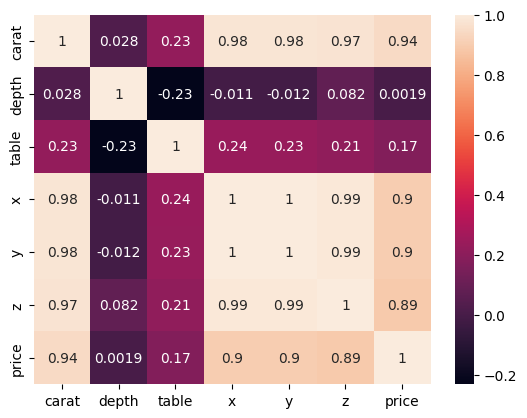

In [14]:
sns.heatmap(df[num_columns].corr(), annot=True)

# we can see that x, y, z and carat are highly correlated independent features so we can remove them 

In [15]:
df[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [16]:
df[cat_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [17]:
print(df['cut'].unique())
print(df['cut'].value_counts())

['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64


# for understanding the rank of each type of cut in diamond we are required to take help from domain experts

In [18]:
print(df['color'].unique())
print(df['color'].value_counts())

['F' 'J' 'G' 'E' 'D' 'H' 'I']
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64


In [19]:
print(df['clarity'].unique())
print(df['clarity'].value_counts())

['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64


In [20]:
cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
clarity_map = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5,"VVS2":6, "VVS1":7, "IF":8}
color_map = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}

In [21]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [22]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 14.8 MB


In [23]:
# Independent and dependent features 
X=df.drop(['price'], axis=1)
y=df.iloc[:,-1]


In [25]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

<Axes: title={'center': ' Before Scaling '}, xlabel='Columns', ylabel='Values'>

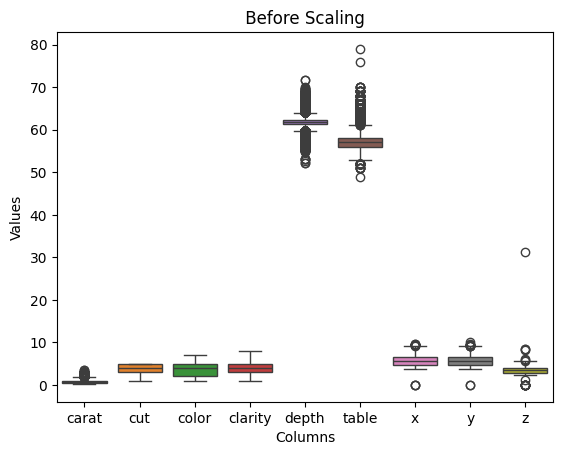

In [26]:
plt.title(" Before Scaling ")
plt.xlabel("Columns")
plt.ylabel("Values")
sns.boxplot(X)

# values and depth having high no of outliers, need to convert them into range

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((129693, 9), (63880, 9), (129693,), (63880,))

Since training model for large datasets like this Random Forest and Support Vector Machine Algorithms takes time
Thus we want to create small dataset by removing x,y,z and by doing  PCA(Principle component analysis) for Random
Forest and Support Vector Mahcine  

In [28]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [29]:
X_small = X.drop(['x', 'y', 'z'], axis=1)

In [21]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
X_small = pca.fit_transform(X_small, )
X_small = pd.DataFrame(X_small, columns=['PCA1', 'PCA2', 'PCA3'])
X_small

,PCA1,PCA2,PCA3
0,0.721592,-0.389524,0.192865
1,1.768786,2.746905,-2.829475
2,-0.661253,0.772069,0.905527
3,-1.638791,0.688727,0.562189
4,1.634043,0.622496,0.028059
...,...,...,...
193568,-1.977814,-1.804975,2.486155
193569,0.334254,1.165524,2.219957
193570,0.223525,-0.822957,-1.162675
193571,-1.668508,-2.849440,-0.996403


In [22]:
pca.explained_variance_ratio_

array([0.38422272, 0.24942012, 0.19122375])

In [23]:
from sklearn.model_selection import train_test_split
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y, test_size=0.33, random_state=42)

<Axes: title={'center': 'Before Scaling '}, xlabel='Columns', ylabel='Values'>

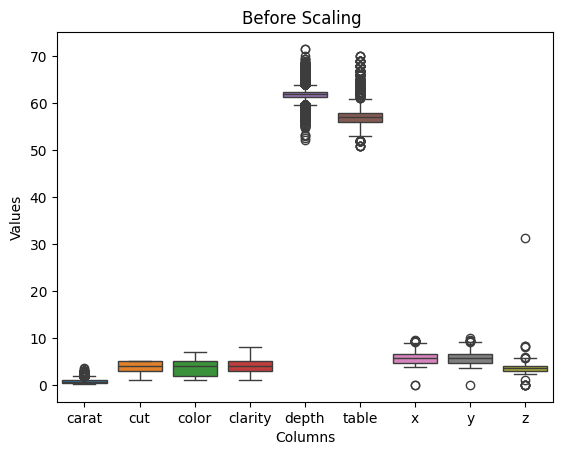

In [24]:
plt.title("Before Scaling ")
plt.xlabel("Columns")
plt.ylabel("Values")
sns.boxplot(X_train)

In [25]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: title={'center': 'Before Scaling '}, xlabel='Columns', ylabel='Values'>

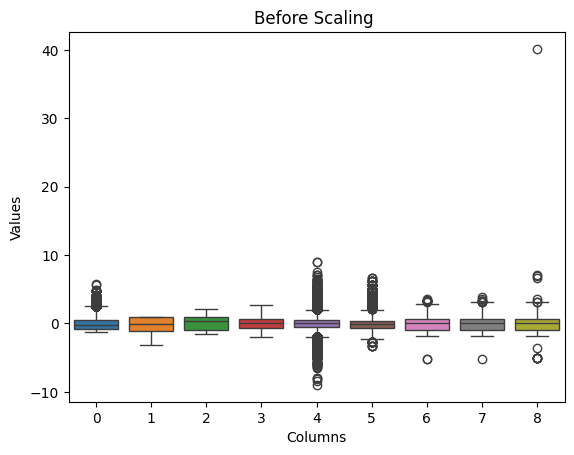

In [26]:
plt.title("Before Scaling ")
plt.xlabel("Columns")
plt.ylabel("Values")
sns.boxplot(X_train_scaled)

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor


In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
models  = {
    "LinearRegression" : LinearRegression(),
    "RidgeRegression" : Ridge(),
    "LassoRegression" : Lasso(),
    "ElasticNet" : ElasticNet(),
    "KNN" : KNeighborsRegressor(),
    "DecisionTreeRegression": DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(),
 #   "GaussianNBRegression" : GaussianProcessRegressor(),
 #   "SupportVectorRegression":SVR()
}

In [49]:
list(models.values())[0]

LinearRegression()

In [50]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [51]:
trained_model_list=[]
model_list=[]
r2_list=[]

keys = list(models.keys())
values = list(models.values())

for i in range(len(values)):
    model = values[i]
    y_pred=[]
    mae=0 
    rmse=0 
    r2_square=0

    #Make Predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)


    print(keys[i]) # name of the model
    model_list.append(model)

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 1014.2749330568605
MAE: 674.7352796098373
R2 score 93.63893549824446


RidgeRegression
Model Training Performance
RMSE: 1014.2878934433298
MAE: 674.8878503734082
R2 score 93.63877293407505




LassoRegression
Model Training Performance
RMSE: 1014.5051494241887
MAE: 676.9096840631897
R2 score 93.63604754881646


ElasticNet
Model Training Performance
RMSE: 1666.8562346886745
MAE: 1148.334794934843
R2 score 82.82033455331369


KNN
Model Training Performance
RMSE: 719.7780597082132
MAE: 379.08643706950534
R2 score 96.79656716119511


DecisionTreeRegression
Model Training Performance
RMSE: 852.3751759241503
MAE: 426.6706950532248
R2 score 95.50758363360478


RandomForest
Model Training Performance
RMSE: 612.0526661198982
MAE: 310.63738338791455
R2 score 97.68369362348615




In [57]:
accuracy_of_models = {}

for i in range(len(keys)):
    accuracy_of_models[keys[i]] = r2_list[i]*100

accuracy_of_models

{'LinearRegression': 93.63893549824446,
 'RidgeRegression': 93.63877293407505,
 'LassoRegression': 93.63604754881646,
 'ElasticNet': 82.82033455331369,
 'KNN': 96.79656716119511,
 'DecisionTreeRegression': 95.50758363360478,
 'RandomForest': 97.68369362348615}

# we can clearly see that random forest have maximum accuracy 

In [58]:
def best_model(models_list, scores):
    best = None
    score = 0 
    for i in range(len(scores)):
        if scores[i] > score :
            score = scores[i]
            best = models_list[i]
    
    return best 
    


In [59]:
best_model(model_list, r2_list)

RandomForestRegressor()

In [7]:
import pickle as pkl 

def makePklFile(key, value):
    for i in range(len(key)):
        file_path = key[i]+".pkl"
        pkl.dump(value[i], open(file_path, 'wb'))


In [61]:
# making pickel files of models with their names
makePklFile(keys, values)

# Doing Hyperparameter tuning with best model to increase its accuracy and the best model is random forest 

In [4]:
import pickle as pkl 
RandomForestRegressor = pkl.load(open("RandomForest.pkl", "rb"))

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_features" : ["sqrt", "log2"],
    "criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth" : [5,6,7,8,9,10]
}

gscv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, verbose=3, scoring="accuracy")
gscv.fit(X_train, y_train)

In [39]:
df[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [40]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
47047,2.01,4,6,2,58.7,58.0,8.20,8.17,4.82
37559,0.40,4,2,3,62.0,59.0,4.70,4.72,2.92
96522,0.40,4,3,3,60.2,61.0,4.78,4.73,2.87
151589,0.47,5,2,2,61.1,56.0,5.01,5.02,3.07
98360,1.51,4,6,5,61.3,60.0,7.36,7.33,4.50
...,...,...,...,...,...,...,...,...,...
119879,0.50,3,2,3,60.2,61.0,5.11,5.15,3.09
103694,1.91,3,3,3,62.3,62.0,7.85,7.79,4.87
131932,1.22,4,4,4,62.8,58.0,6.82,6.74,4.26
146867,0.31,3,4,7,61.1,56.0,4.37,4.40,2.67


In [41]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

[4 3 5 2 1]
[3 7 4 2 1 5 6]
[4 2 5 3 8 6 7 1]


In [42]:
df['cut'].unique()

array([4, 3, 5, 2, 1], dtype=int64)